# Face Emotion Detection Using Convolutional Neural Network (CNN)

## Importing the necessary libraries and plotting the sample images from all the 7 classes in the training directory

Using TensorFlow backend.


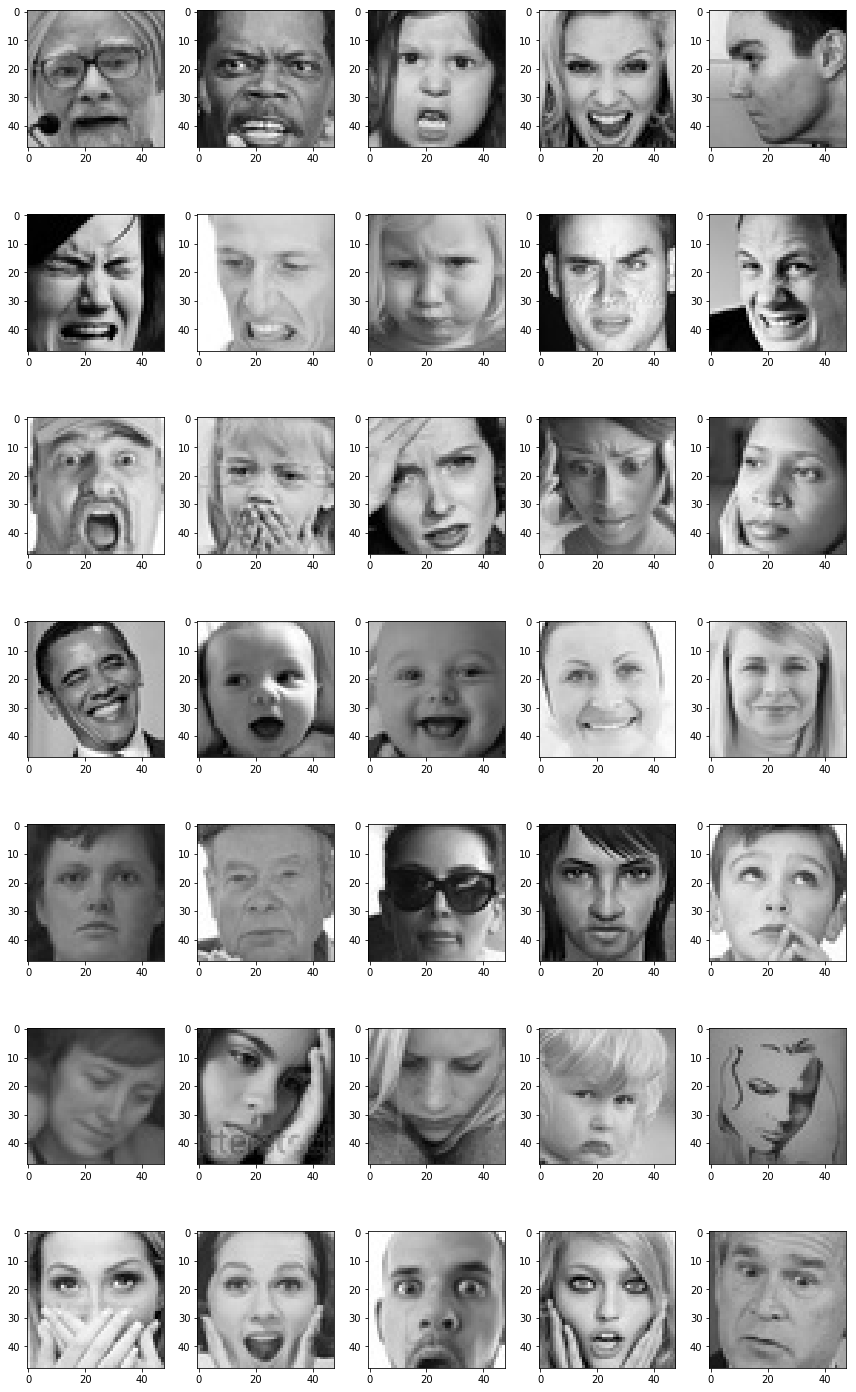

In [1]:
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
%matplotlib inline
import os

# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "C:/Users/dvgna/Desktop/FER/images/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

## Counts of all the images in 7 classes in the training directory

In [2]:
for expression in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")

3993 angry images
436 disgust images
4103 fear images
7164 happy images
4982 neutral images
4938 sad images
3205 surprise images


## Defining the data generator class for training and validation

In [3]:
from keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "validation",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [12]:
filenames = validation_generator.filenames
nb_samples = len(filenames)
print(nb_samples)

7066


## Defining the model's architecture with 4 CNN layers, 1 flatten and 2 fully connected and a output layer with 'Adam' as the optimiser and 'Categorical_Crossentropy' as the loss function with 'Accuracy' as the metric

In [4]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

W0803 22:53:30.702580 12068 deprecation_wrapper.py:119] From C:\Users\dvgna\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0803 22:53:31.191274 12068 deprecation_wrapper.py:119] From C:\Users\dvgna\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0803 22:53:31.200250 12068 deprecation_wrapper.py:119] From C:\Users\dvgna\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0803 22:53:31.236154 12068 deprecation_wrapper.py:119] From C:\Users\dvgna\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0803 22:53:31.237151 12068 deprecation_wrapper.py:119] 

## Only Model's best performance is checkpointed and saved to model's weight with 50 epochs, the model's training took approx 23 hours and 15 mins !

In [5]:
%%time

# number of epochs to train the NN
epochs = 60

from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("face_expression_model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )


W0803 22:53:49.284256 12068 deprecation.py:323] From C:\Users\dvgna\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/60
225/225 [==============================] - 1106s 5s/step - loss: 2.0063 - acc: 0.2306 - val_loss: 1.7446 - val_acc: 0.3017

Epoch 00001: val_acc improved from -inf to 0.30170, saving model to face_expression_model_weights.h5
Epoch 2/60
225/225 [==============================] - 1061s 5s/step - loss: 1.8265 - acc: 0.2957 - val_loss: 1.6823 - val_acc: 0.3396

Epoch 00002: val_acc improved from 0.30170 to 0.33958, saving model to face_expression_model_weights.h5
Epoch 3/60
225/225 [==============================] - 1064s 5s/step - loss: 1.7315 - acc: 0.3340 - val_loss: 1.6044 - val_acc: 0.3804

Epoch 00003: val_acc improved from 0.33958 to 0.38037, saving model to face_expression_model_weights.h5
Epoch 4/60
225/225 [==============================] - 1073s 5s/step - loss: 1.6536 - acc: 0.3635 - val_loss: 1.6166 - val_acc: 0.3854

Epoch 00004: val_acc improved from 0.38037 to 0.38541, saving model to face_expression_model_weights.h5
Epoch 5/60
225/225 [===========================

In [6]:
print(model.history)

## Plotting the Training and Validation (Loss and Accuracy)

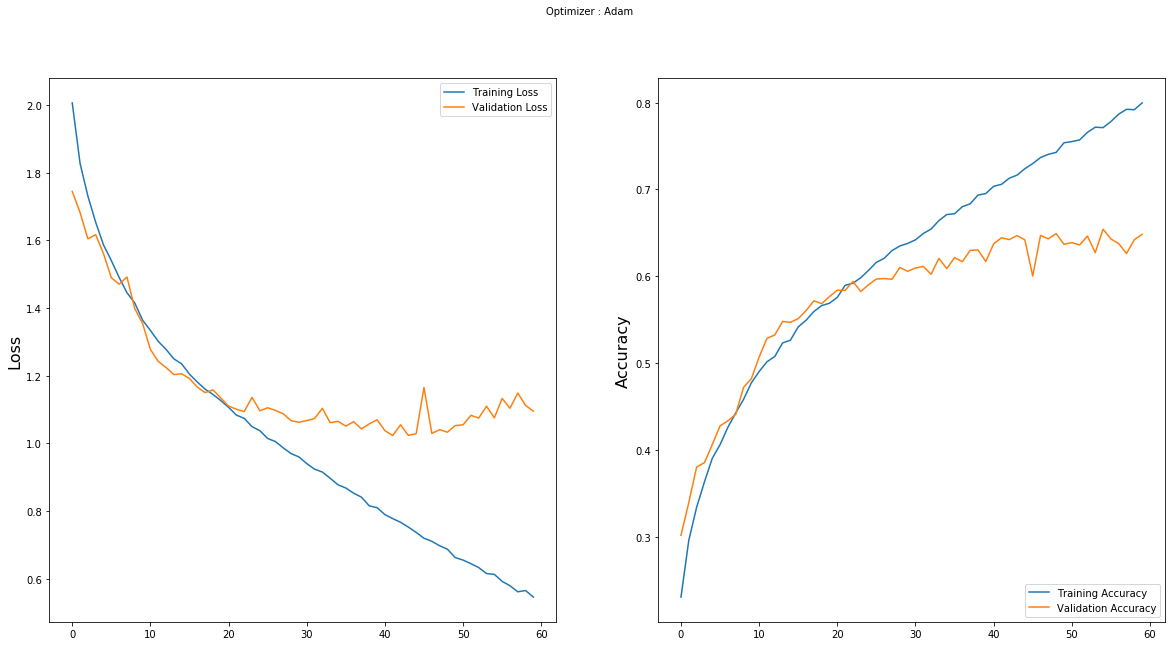

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(model.history.history['acc'], label='Training Accuracy')
plt.plot(model.history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## Finally computing the predictions and plotting the actual vs predicted labels in a confusion matrix

<Figure size 432x288 with 0 Axes>

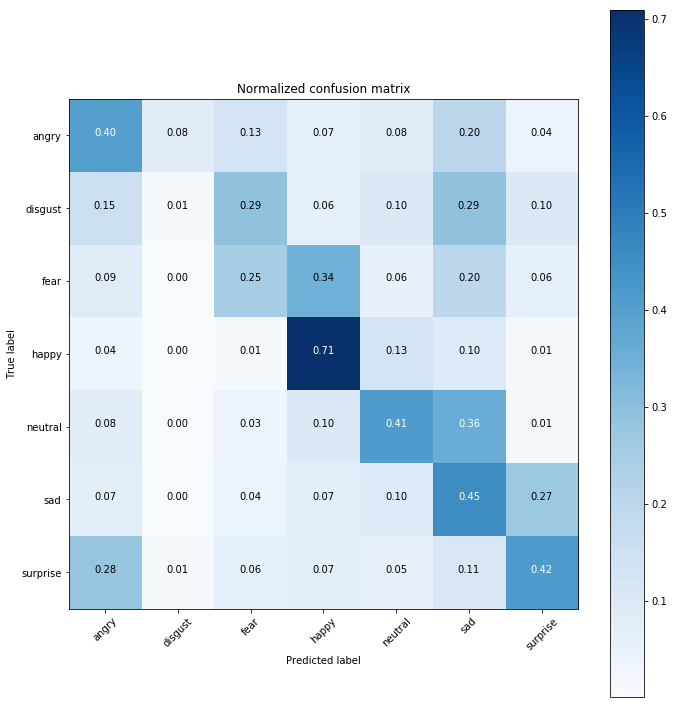

In [17]:
# compute predictions
predictions = model.predict_generator(generator=validation_generator, steps= nb_samples/batch_size)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()